In [7]:
! pip install git+https://github.com/lenarsaitov/cianparser.git --force-reinstall
# Обязательно петрезапустить ядро

In [ ]:
import cianparser

moscow_parser = cianparser.CianParser(location="Москва")
data = moscow_parser.get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=True, additional_settings={"start_page":1, "end_page":50})

print(data[0])

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [40]:
my_path = r'C:\Users\Mitrich\Documents\Repository_1\HomeWork_2'
df = pd.read_csv(f'{my_path}\\cian_flat_sale_1_50_moskva_05_Jul_2024_02_30_59_092383.csv', sep = ';')
df = df[df['price'] != 0]
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,БЭЛ Девелопмент,developer,https://www.cian.ru/sale/flat/303377181/,Москва,sale,flat,3,6,2,38.7,38313000.0,Тверской,Долгоруковская,25к2,Новослободская,Долгоруковская 25
1,ID 108172779,real_estate_agent,https://www.cian.ru/sale/flat/301496936/,Москва,sale,flat,7,8,1,53.2,58786000.0,Таганский,Славянская площадь,2/5с1,Китай-город,LUMIN
2,VESPER,developer,https://www.cian.ru/sale/flat/262519758/,Москва,sale,flat,5,21,2,110.6,103787040.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
3,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/302081797/,Москва,sale,flat,2,10,2,69.4,85000000.0,Тверской,Палиха,4,Менделеевская,Клубный дом Maison Rouge
4,EraOneHolding,developer,https://www.cian.ru/sale/flat/280427150/,Москва,sale,flat,3,5,2,178.6,150400000.0,Арбат,Арбат,39,Смоленская,Artisan


In [78]:
# Добавим столбец - цена комнаты 
df['price_room'] = df['price']/df['rooms_count']

# Добавим столбец - цена 1 кв.метра 
df['price_kvm'] = df['price']/df['total_meters']


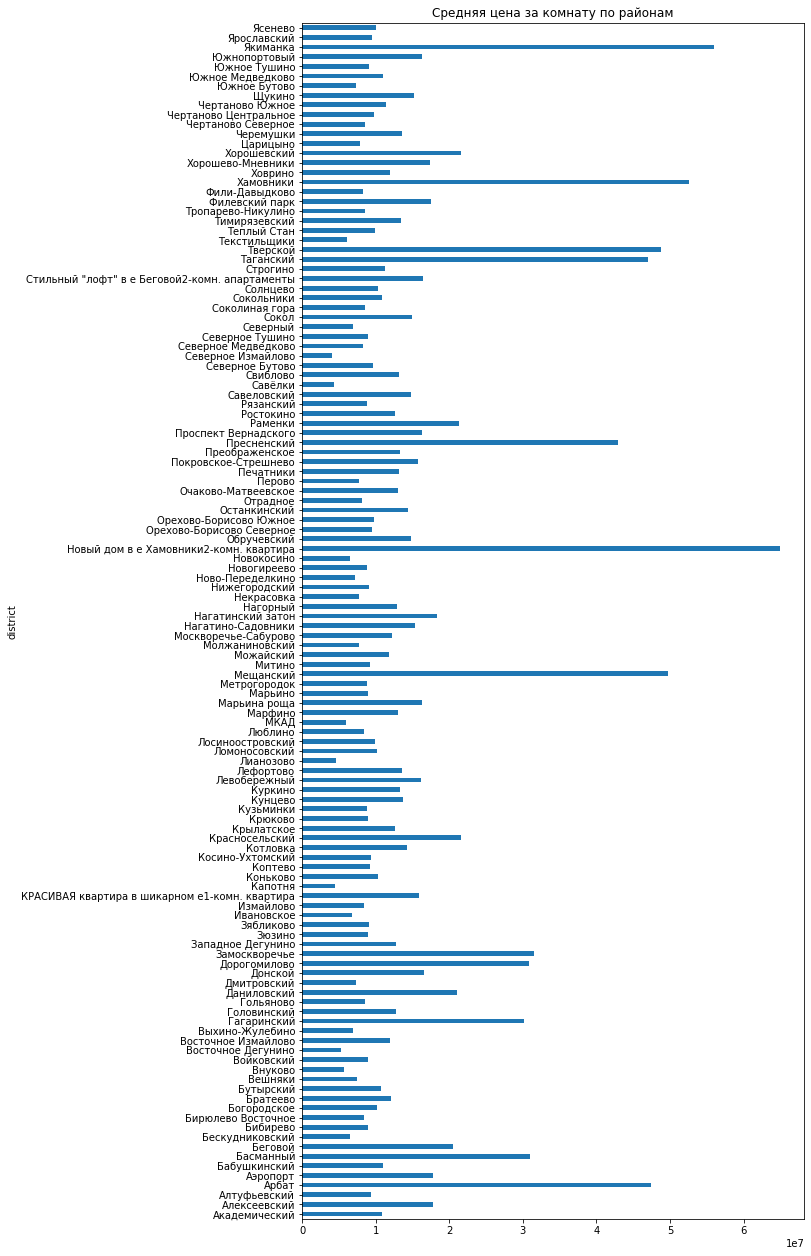

In [79]:
df_1 = df[['district','price_room']].groupby('district').mean()
df_1 = df_1.reset_index()
df_1 = df_1.set_index('district')['price_room']

rcParams['figure.figsize'] = 9,22
df_1.plot(kind='barh',
         title = 'Средняя цена за комнату по районам')
plt.show()

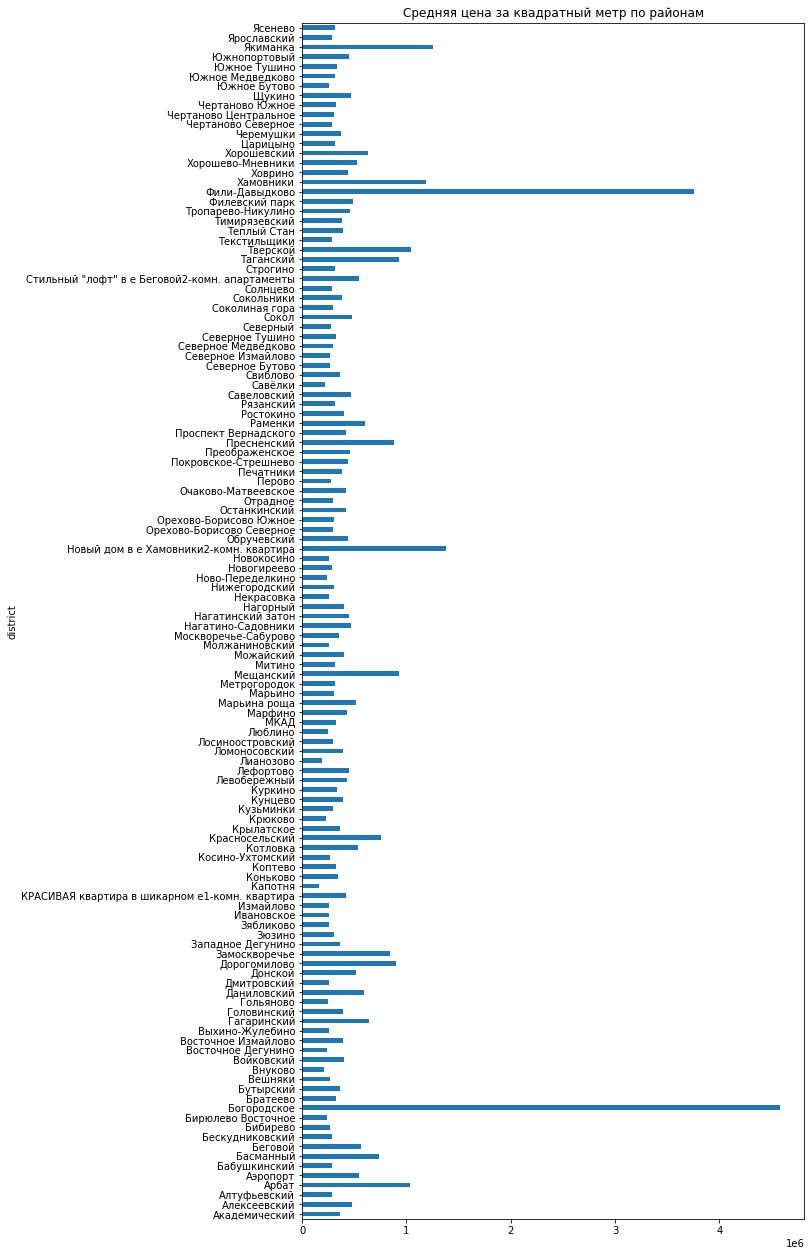

In [80]:
df_2 = df[['district','price_kvm']].groupby('district').mean()
df_2 = df_2.reset_index()
df_2 = df_2.set_index('district')['price_kvm']

rcParams['figure.figsize'] = 9,22
df_2.plot(kind='barh',
          title = 'Средняя цена за квадратный метр по районам')
plt.show()

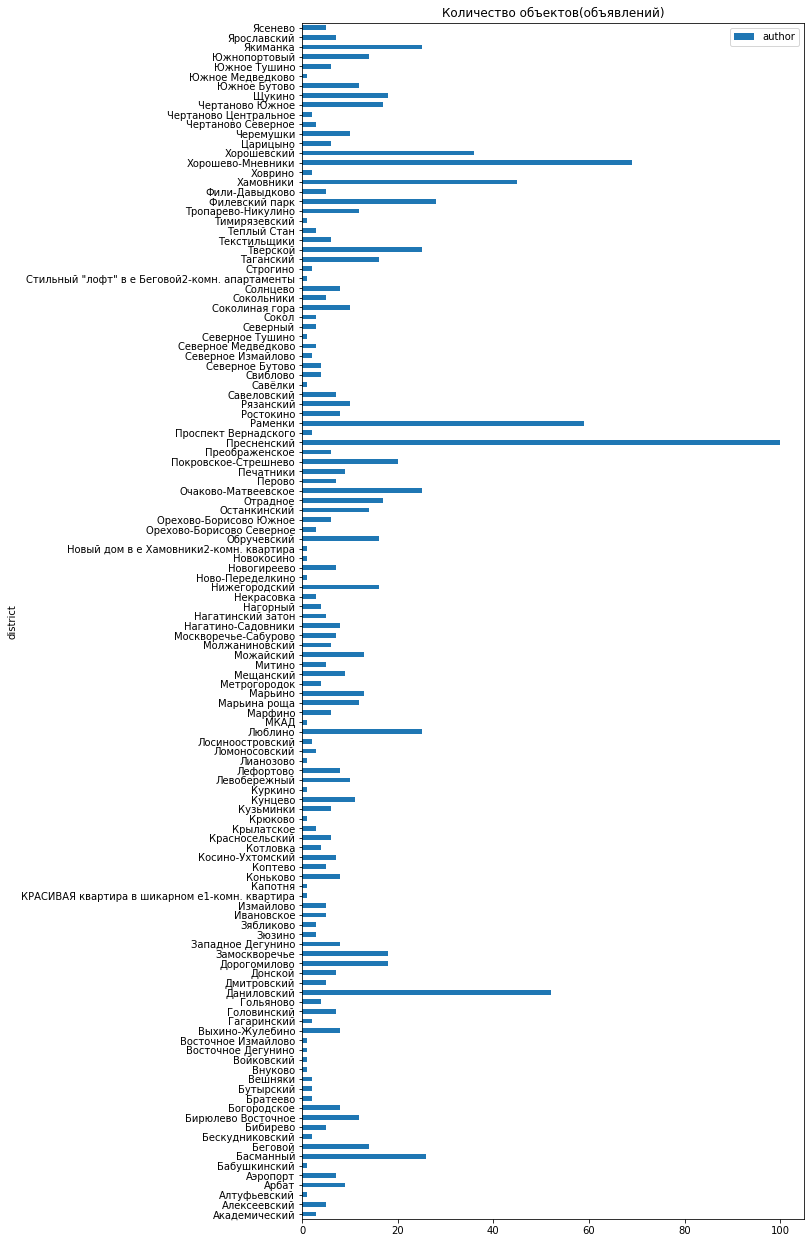

In [81]:
df_3 = df.groupby('district').count()[['author']]
df_3 = df_3.reset_index()
df_3 = df_3.set_index('district')

# df_3 = df_3[df_3['author'] == 1]

rcParams['figure.figsize'] = 9,22
df_3.plot(kind='barh',
          title = 'Количество объектов(объявлений)')
plt.show()
